<a href="https://colab.research.google.com/github/hamiko424/2022_shinkei_handson/blob/master/Sound_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sample script for Sound, Text processing
- Sound
    - Sound wave Visualization
    - Sound Spectrogram visualization
    - Mel Spectrum and MFCC
    - Speech to Text
- Text
    - Text Preprocessing

In [1]:
!pip install praat-parselmouth
!pip install ibm-watson
!pip install mojimoji
!pip install logzero
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7
!pip install unidic-lite
!pip install -U ginza ja-ginza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.7 MB 18.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 338 kB 29.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 139 kB 44.4 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-6.0.0-py3-none-any.whl size=336807 sha256=63df18fab7ca5ee99d83522808314c51a5f4ce673021b3055bbcf4bd1d6549e8
  Stored in directory: /root/.cache/pip/wheels/31/de/dd/1002a4fdfeed1322ccffb20b0a12e00afbeeee8df4a86769d7
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core

### Download Video and convert to mp3 file

In [2]:
!mkdir data
!wget "https://drive.google.com/uc?id=1DPHCcrUq9eU66HbJAoLPlpLlO6fRPO58&export=download" -O ./data/ANN_News_20220717.mp4


--2022-07-19 12:17:50--  https://drive.google.com/uc?id=1DPHCcrUq9eU66HbJAoLPlpLlO6fRPO58&export=download
Resolving drive.google.com (drive.google.com)... 142.251.16.138, 142.251.16.102, 142.251.16.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u6e7bq2cbt4f4lroj6h1ft8mnn4qd1bf/1658233050000/06049720383510427655/*/1DPHCcrUq9eU66HbJAoLPlpLlO6fRPO58?e=download&uuid=472f23e1-f689-45d1-9cde-a77d567b15d6 [following]
--2022-07-19 12:17:51--  https://doc-0o-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u6e7bq2cbt4f4lroj6h1ft8mnn4qd1bf/1658233050000/06049720383510427655/*/1DPHCcrUq9eU66HbJAoLPlpLlO6fRPO58?e=download&uuid=472f23e1-f689-45d1-9cde-a77d567b15d6
Resolving doc-0o-0o-docs.googleusercontent.com (doc-0o-0o-docs.googleusercontent.com)... 172.253.63.132, 2607:

In [3]:
!ffmpeg -y -i ./data/ANN_News_20220717.mp4 -ac 1 -f wav -bits_per_raw_sample 16 -ar 48000 ./data/ANN_News_20220717.wav

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

## Sound wave Visualization

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from IPython.display import Audio

import statistics

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


### Load sample sound data
* Sample data: [Open Speech Repository](https://www.voiptroubleshooter.com/open_speech/american.html)

In [5]:
sound_params = {
    'n_mels': 13, #Default
    #'frame_length': 0.1, #second, default
    'f_max' : 8000,
    'f_min' : 0
}

### MFCC Parameters
n_mels = sound_params['n_mels']
#frame_length = sound_params['frame_length']
f_max = sound_params['f_max']
f_min = sound_params['f_min']

In [6]:
audio_file_path = "./data/"

audio_file_name = "ANN_News_20220717.wav"

#Load the audio - wave data
data, sampling_rate = librosa.load(audio_file_path + audio_file_name, res_type='kaiser_fast')

print("data.shape = ", data.shape)
print("sampling_rate = ", sampling_rate)
print("Time Length = ", len(data)/sampling_rate)

data.shape =  (1181697,)
sampling_rate =  22050
Time Length =  53.59170068027211


In [7]:
Audio(data, rate=sampling_rate)

#### Sound wave Visualization

Text(0.5, 1.0, 'signal of Voice')

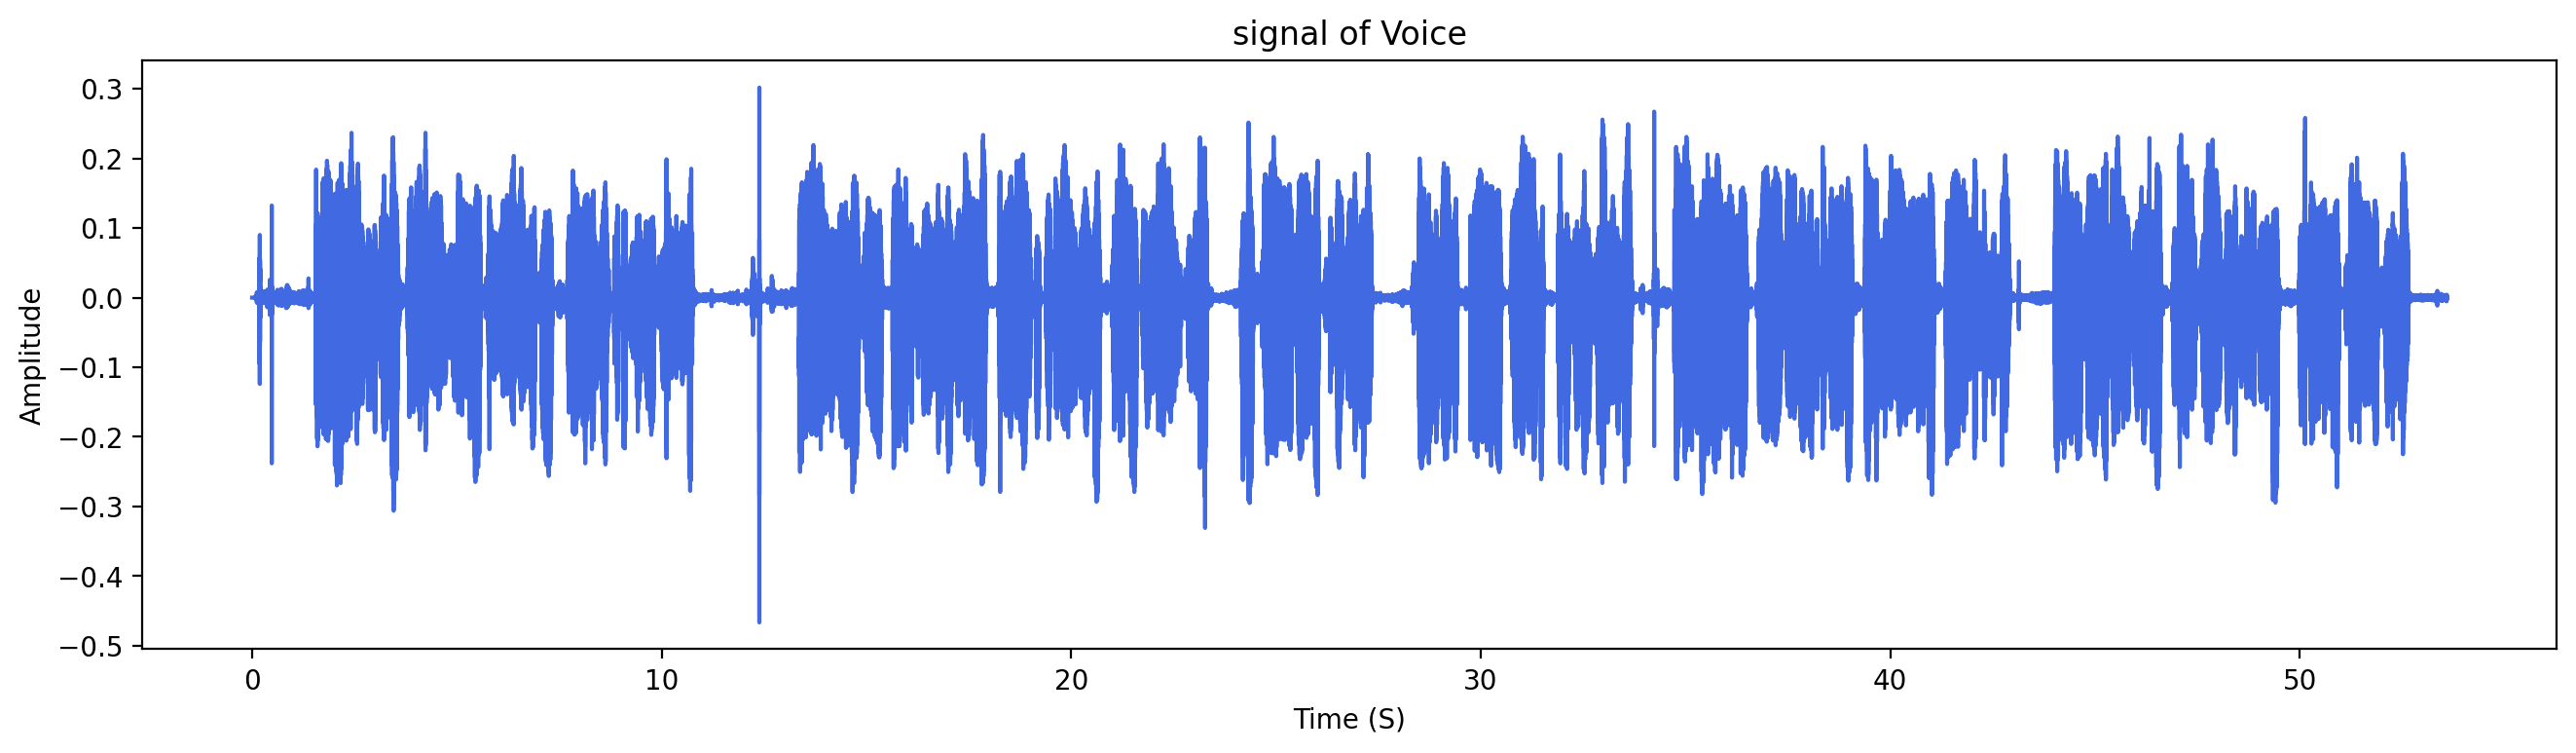

In [8]:
data_db = librosa.amplitude_to_db(data)

signal_num = np.arange(len(data))

plt.figure(figsize=(16, 4), dpi = 200)
plt.plot(signal_num/sampling_rate, data, color='royalblue')
plt.ylabel("Amplitude")
plt.xlabel("Time (S)")
plt.title("signal of Voice")

### Sound Spectrogram visualization

* Apply Fourier Transform

<img src = 'https://miro.medium.com/max/700/1*xTYCtcx_7otHVu-uToI9dA.png'>

FFT Time window =  0.7430385487528345  (s)


Text(0.5, 1.0, 'Sound Spectrum')

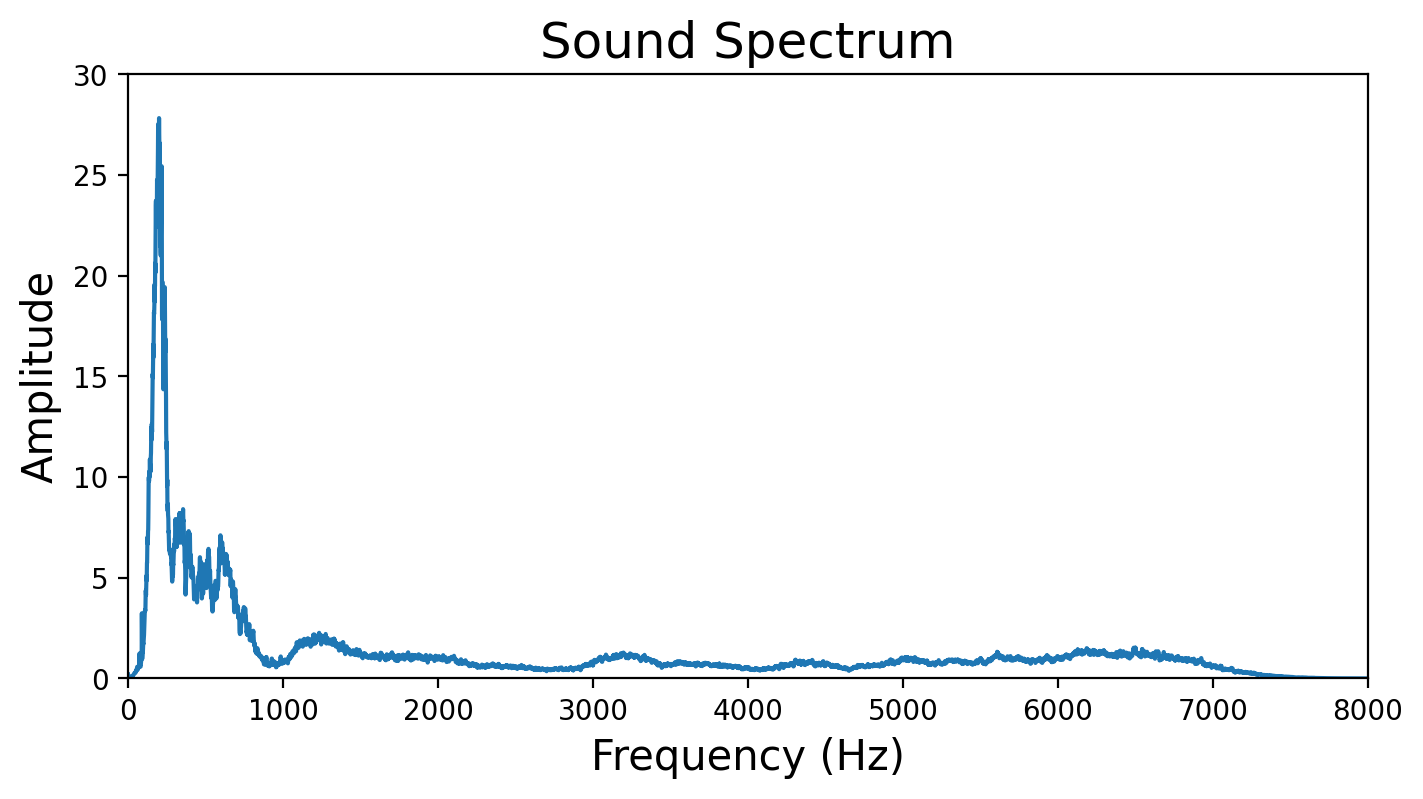

In [9]:
n_fft = 2048*8 #FFT Time window, ~ 0.8s


hop_length = 512
print("FFT Time window = ", n_fft/sampling_rate, " (s)")
D = np.abs(librosa.stft(data, n_fft=n_fft,  hop_length=hop_length))

plt.figure(figsize = (8,4), dpi = 200)
plt.plot(D[:, :].mean(axis = 1), label = "Sound Spectrum");
plt.xlim(0, 8000)
plt.ylim(0, 30)
plt.xlabel("Frequency (Hz)", fontsize = 15)
plt.ylabel("Amplitude", fontsize = 15)
plt.title("Sound Spectrum", fontsize = 18)
# plt.legend()

#### Plot the voice spectrum (Linear and log)

Text(0.5, 1.0, 'Log-frequency power spectrogram')

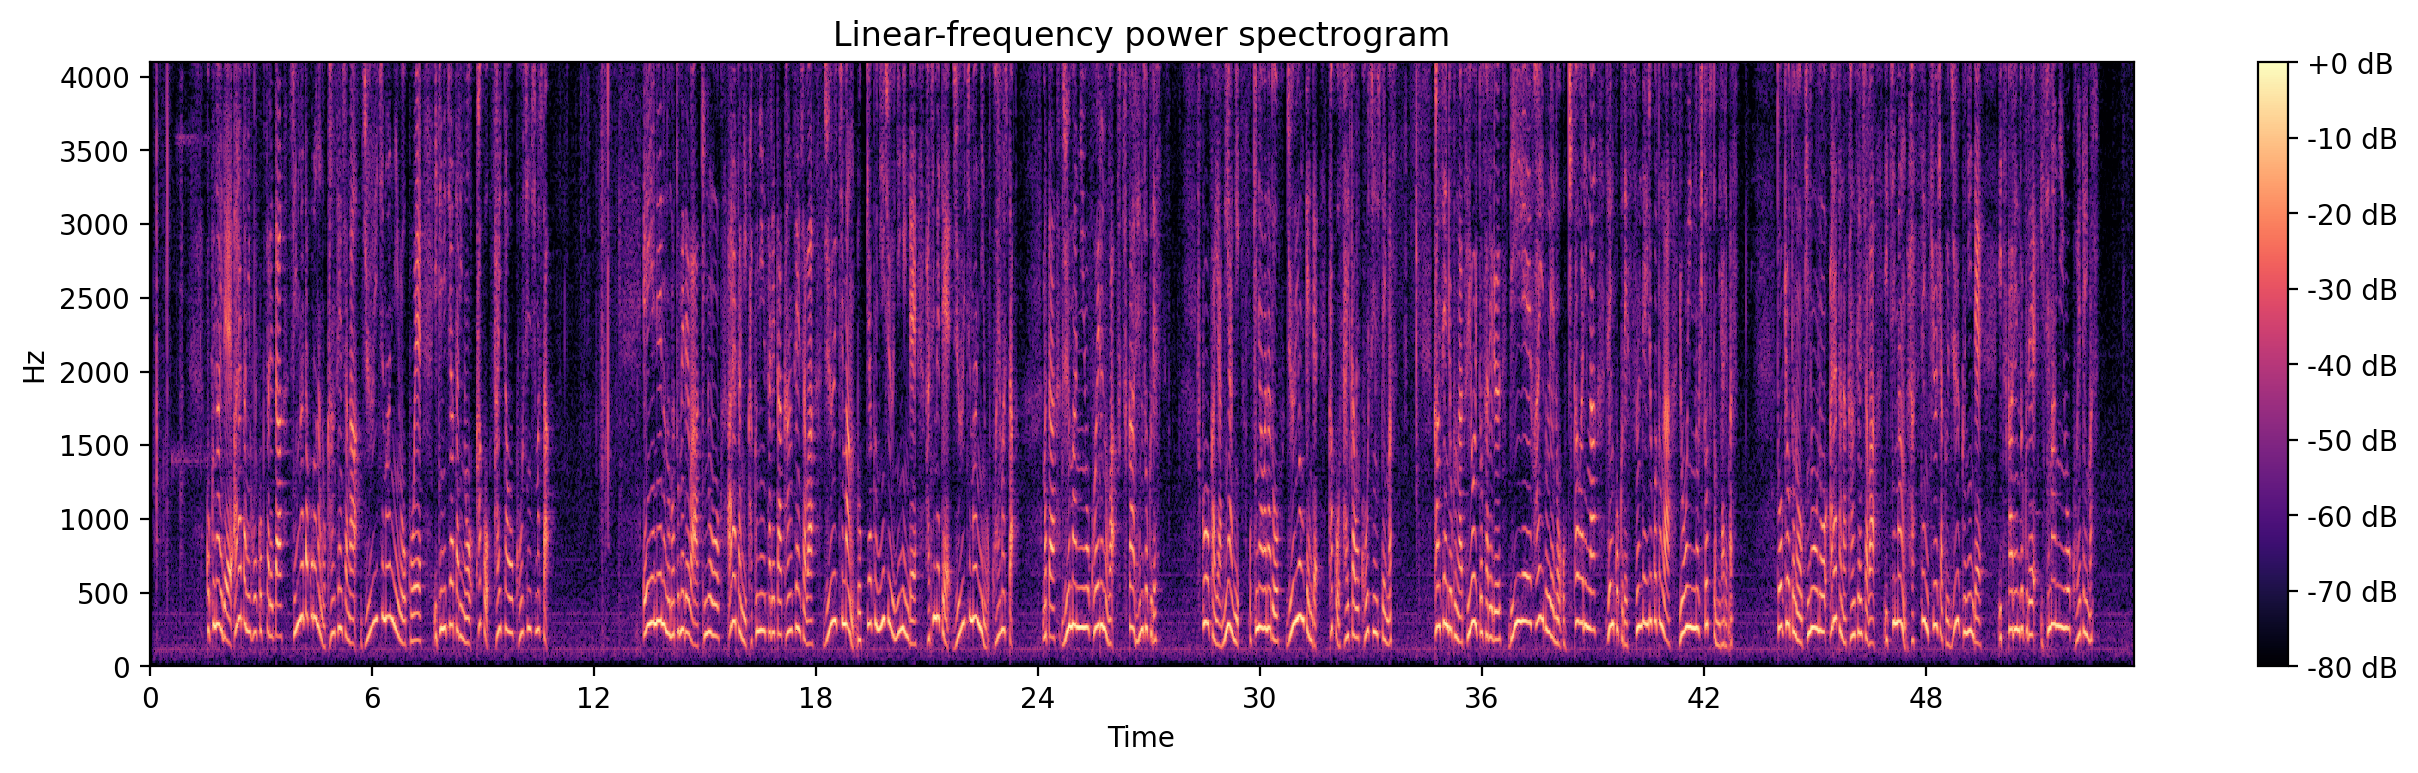

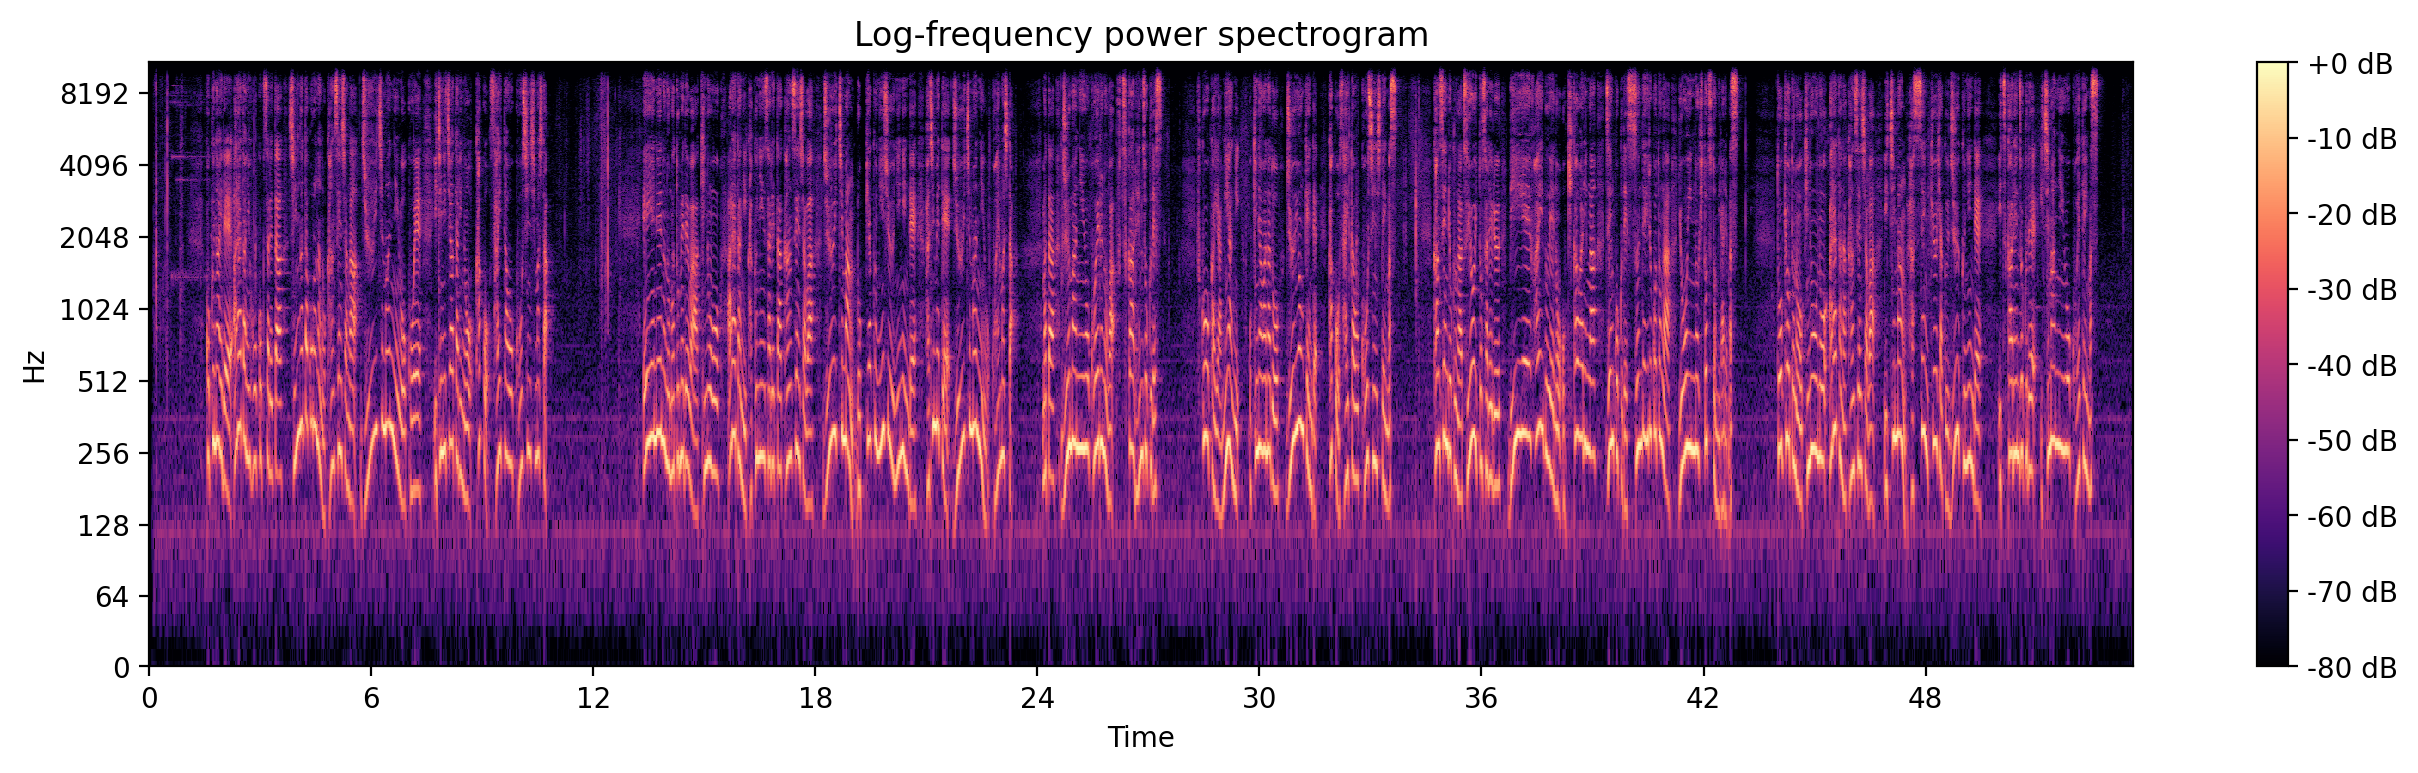

In [10]:
plt.figure(figsize=(16, 4), dpi = 200)

#Linear
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
#plt.subplot(2, 1, 1)
librosa.display.specshow(D, y_axis='linear', sr=sampling_rate, hop_length=hop_length, x_axis='time')
plt.ylim([0, 4096])
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# #Log
plt.figure(figsize=(16, 4), dpi = 200)
librosa.display.specshow(D, y_axis='log', sr=sampling_rate, hop_length=hop_length, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

### Calculate the Shimmer, Jitter and F0, F1, F2
* Lib: [Parselmouth](https://github.com/YannickJadoul/Parselmouth)
* Sample script: https://github.com/drfeinberg/PraatScripts/blob/master/Measure%20Pitch,%20HNR,%20Jitter,%20Shimmer,%20and%20Formants.ipynb?short_path=cf114d9
* Pitch and Jitter
    * [Praat script manual](https://www.fon.hum.uva.nl/praat/manual/)
    * e.g. call(sound, "To Manipulation", 0.01, 75, 600): “Time step (s)”, “Minimum pitch (Hz)”, and “Maximum pitch (Hz)”), [Reference](https://parselmouth.readthedocs.io/en/stable/examples/pitch_manipulation.html)
    * [Jitter Introduction](https://www.fon.hum.uva.nl/praat/manual/Voice_2__Jitter.html)
        * [Jitter API](https://www.fon.hum.uva.nl/praat/manual/PointProcess__Get_jitter__local____.html)
    * [Shimmer Introduction](https://www.fon.hum.uva.nl/praat/manual/Voice_3__Shimmer.html)
    * Shimmer and Jitter Script: [Voice 6. Automating voice analysis with a script
](https://www.fon.hum.uva.nl/praat/manual/Voice_6__Automating_voice_analysis_with_a_script.html)
* Formant
    * [Formant Introduction](https://www.fon.hum.uva.nl/praat/manual/Formant.html)

In [ ]:
import parselmouth
from parselmouth.praat import call

* Foundamental Frequency (F0)

In [ ]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    #plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.ylim([0, 2000])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    #plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    #plt.ylim(0, pitch.ceiling)
    plt.ylim([0, 1000])
    plt.ylabel("fundamental frequency [Hz]")


sound = parselmouth.Sound(audio_file_path + audio_file_name)

* Calculate Pitch, Jitter-local and Shimmer-local

In [ ]:
unit = "Hertz"
f0min = 75
f0max = 600

duration = call(sound, "Get total duration") # duration
print("duration = ", duration)

pitch = call(sound, "To Pitch", 0.0, 75, 500)

meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch

print("meanF0 = ", meanF0)

duration =  53.59166666666667
meanF0 =  239.12040452766652


Text(0.5, 1.0, 'Spectrum and fundamental frequency (F0, fundamental pitch)')

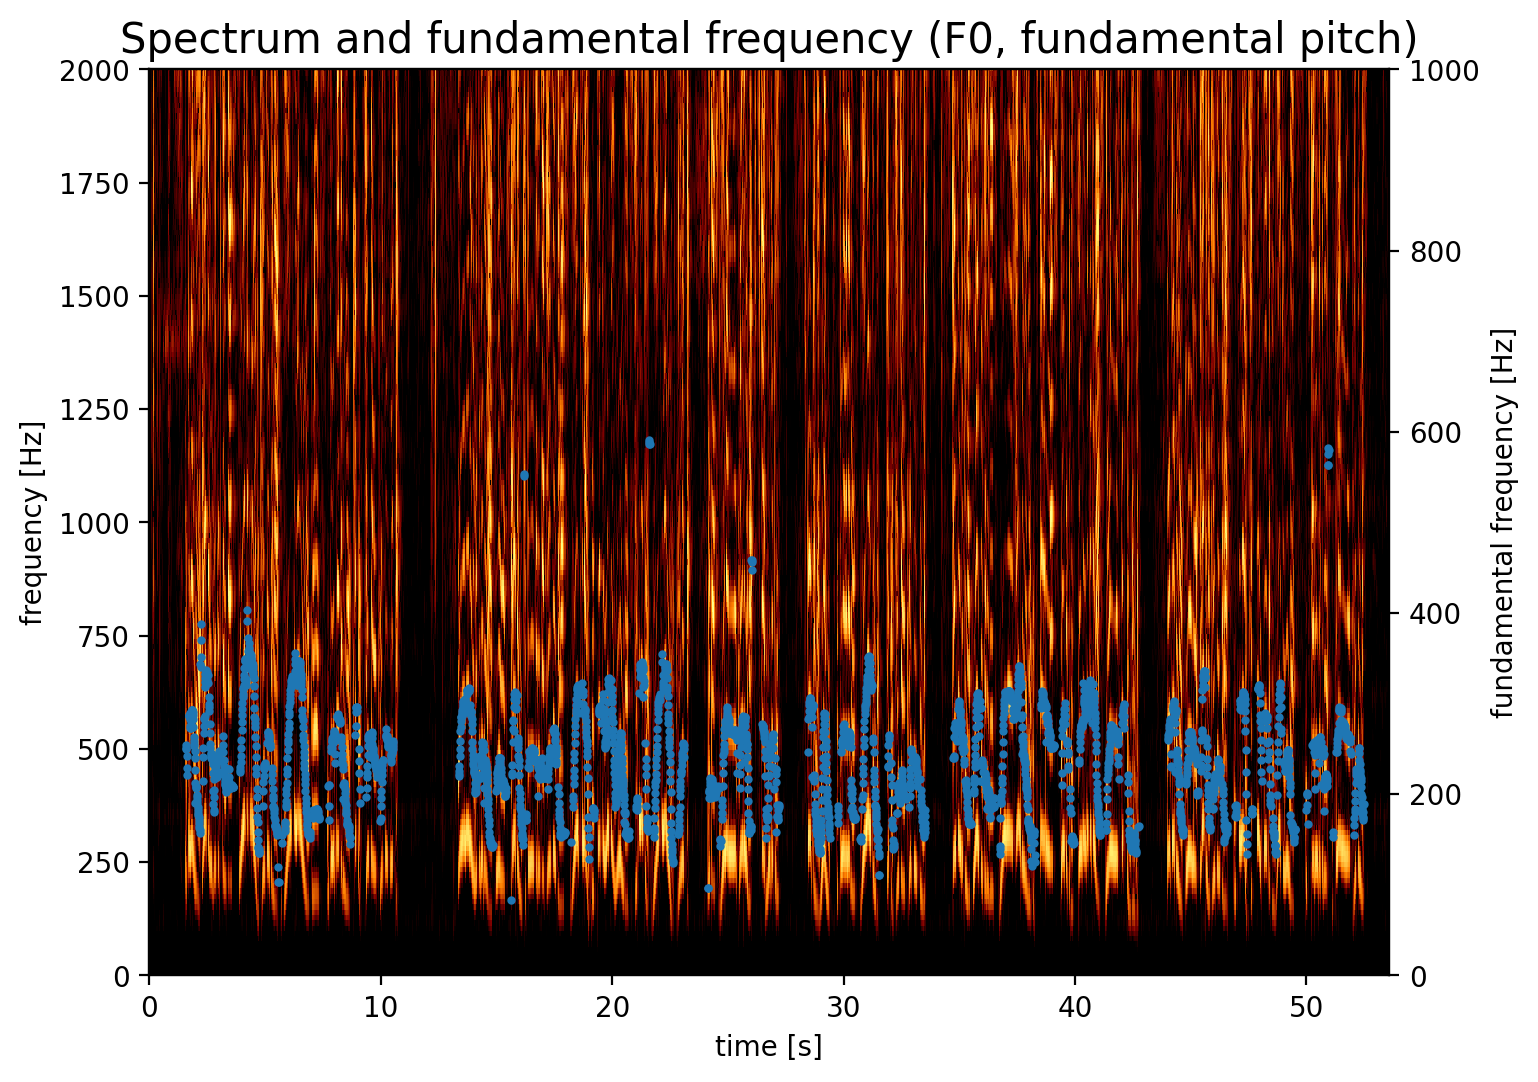

In [ ]:
pitch = sound.to_pitch()

# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_sound = sound.copy()
pre_emphasized_sound.pre_emphasize()
spectrogram = pre_emphasized_sound.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure(figsize = (8, 6), dpi = 200)
draw_spectrogram(spectrogram)

plt.twinx()
draw_pitch(pitch)
plt.xlim([sound.xmin, sound.xmax])
plt.title("Spectrum and fundamental frequency (F0, fundamental pitch)", fontsize = 15)

* Calculate F2 - Second Formant

In [ ]:
pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)

numPoints = call(pointProcess, "Get number of points") # 1 point ~ 0.01s
#https://www.fon.hum.uva.nl/praat/manual/Sound__To_Formant__burg____.html
formants = call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50) #Time step (s), Maximum number of formants, Formant ceiling (Hz, default = 5000Hz), window length (s, default = 0.025s for gaussian window, ~ 52Hz), Pre-emphasis from (Hz, default = 50Hz, which means frequencies below 50Hz are not enhanced) 

f1_list = []
f2_list = []
f3_list = []

# Measure formants only at glottal pulses
for point in range(0, numPoints):
    point += 1
    t = call(pointProcess, "Get time from index", point)
    f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear') #Formant number, time (s), Units (Hz), Interpolation (default = Linear), https://www.fon.hum.uva.nl/praat/manual/Formant__Get_value_at_time___.html
    f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
    f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
    f1_list.append(f1)
    f2_list.append(f2)
    f3_list.append(f3)
    
f1_median = statistics.median(f1_list)
f2_median = statistics.median(f2_list)
f3_median = statistics.median(f3_list)

print("f1_median = ", f1_median)
print("f2_median = ", f2_median)
print("f3_median = ", f3_median)

f1_median =  420.9862854669518
f2_median =  1584.9289355627325
f3_median =  2675.734425397003


* Shimmer And Jitter

In [ ]:
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)

print("localJitter = ", localJitter)

localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

print("localShimmer = ", localShimmer)

localJitter =  0.019405469097478995
localShimmer =  0.0622365570983707


## Mel Spectrum and MFCC
* [Mel Frequency Cepstral Coefficient (MFCC) tutorial](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/)
* [Speech Processing for Machine Learning: Filter banks, Mel-Frequency Cepstral Coefficients (MFCCs) and What's In-Between](https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html)
* Function URL: http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.mfcc.html

<img src = 'https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F231777%2F42e112fb-c19e-bf5d-df27-16a7176da3ef.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=780ce00ba6e2800de0d76d45e541dffe'>

#### Mel and Mel Filter bank

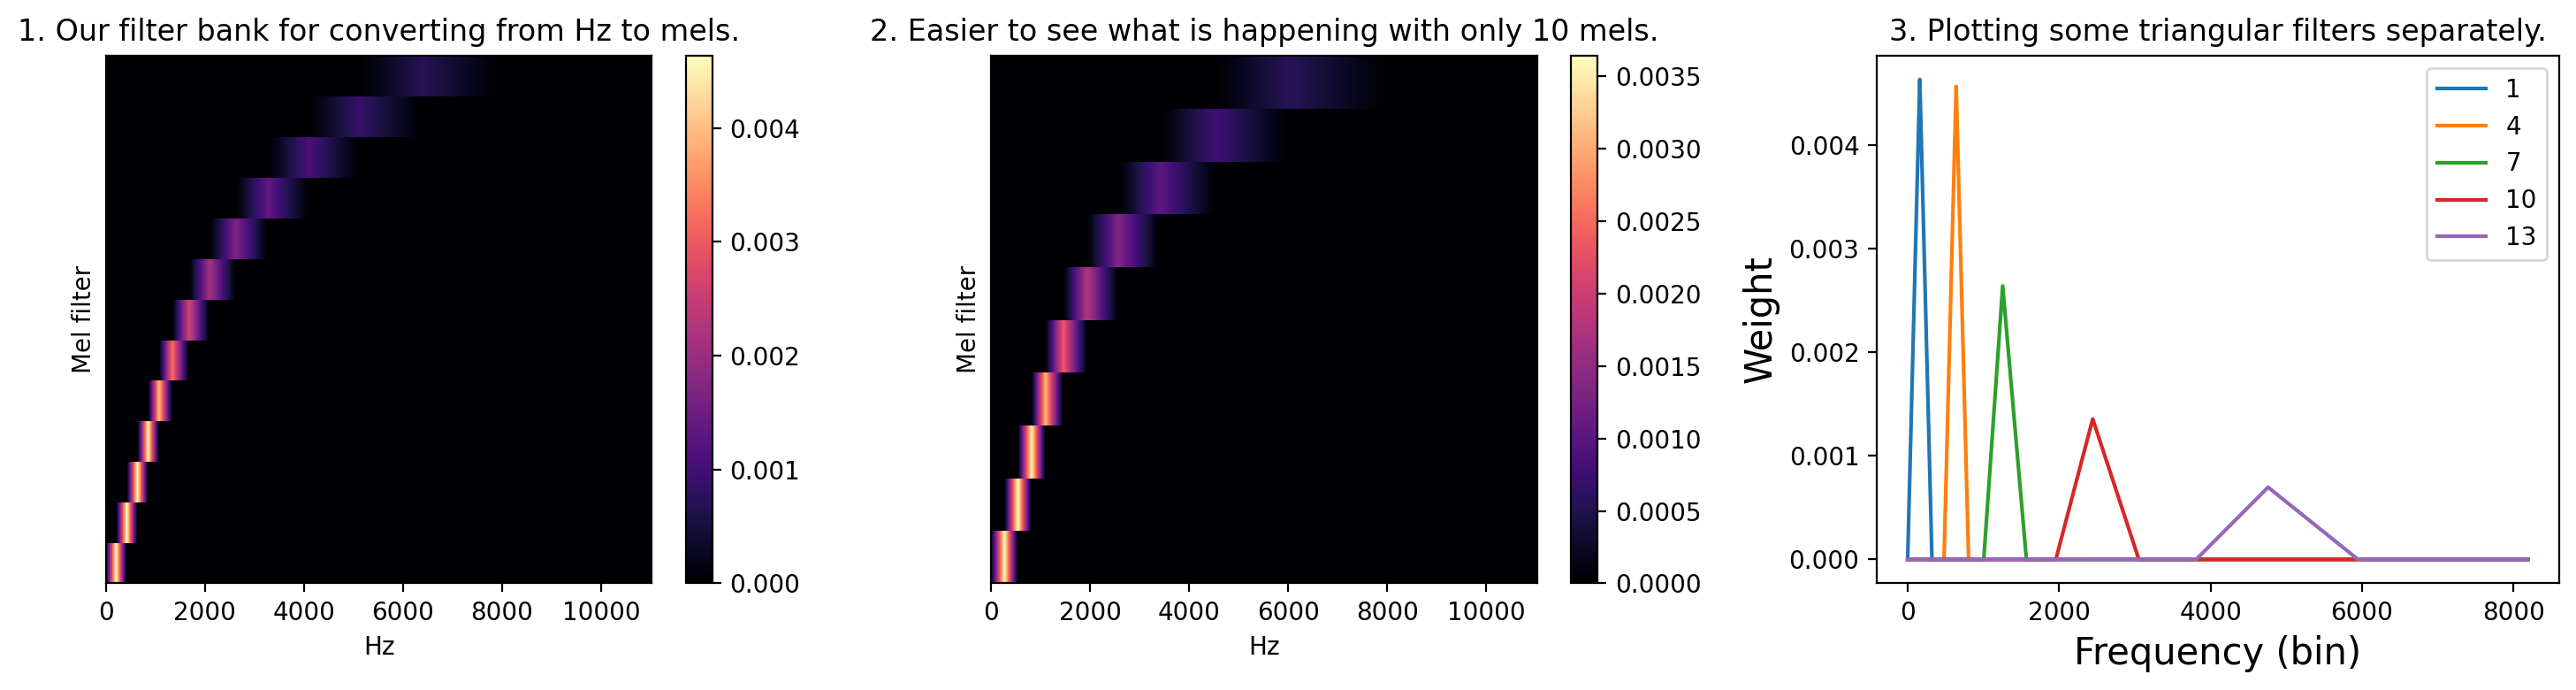

In [ ]:
mel = librosa.filters.mel(sr=sampling_rate, n_fft=n_fft, n_mels=n_mels, fmax=8000) #Create a Mel filter-bank, size = (n_mels) * (n_fft/2 + 1)

plt.figure(figsize=(15, 4), dpi = 200);

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sampling_rate, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sampling_rate, n_fft=n_fft, n_mels=10, fmax = 8000)
librosa.display.specshow(mel_10, sr=sampling_rate, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 3, 6, 9, 12] #12 mel
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');
plt.xlabel("Frequency (bin)", fontsize = 15)
plt.ylabel("Weight", fontsize = 15)

plt.tight_layout();

### Mel Spectrum (Sound Pitch)

Text(0.5, 1.0, 'Log-frequency power spectrogram in Mel')

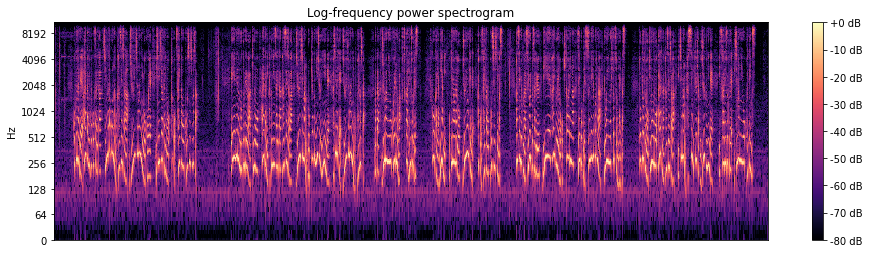

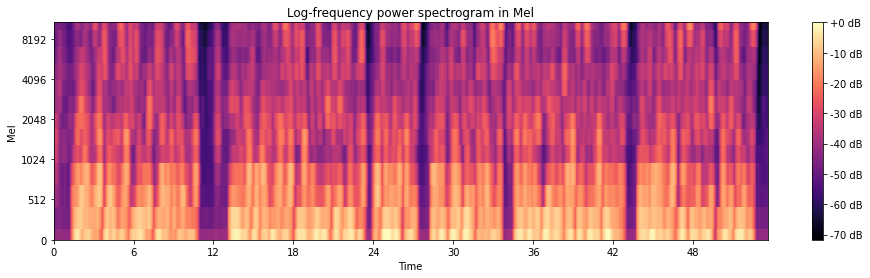

In [ ]:
plt.figure(figsize=(16, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
# #Log
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')


plt.figure(figsize=(16, 4))
S = librosa.feature.melspectrogram(data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.ylabel("Mel")
plt.colorbar(format='%+2.0f dB');
plt.title('Log-frequency power spectrogram in Mel')

### MFCC

(13, 2309)


Text(0.5, 1.0, 'MFCC Number = 13')

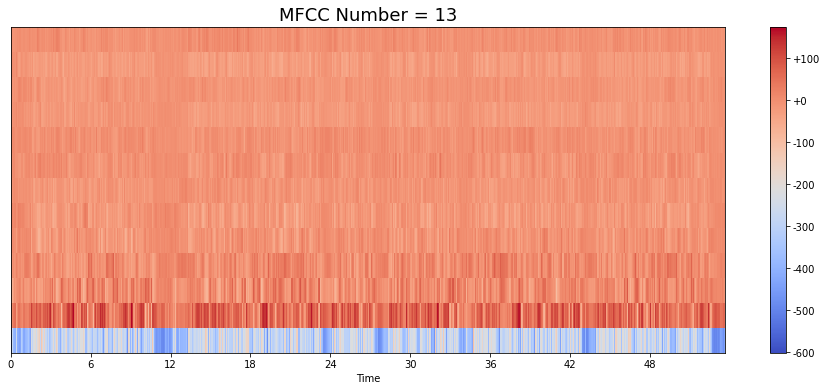

In [ ]:
mfcc_num = n_mels
mfcc=librosa.feature.mfcc(y=data, sr=sampling_rate, hop_length=hop_length, n_mfcc=mfcc_num, fmax=f_max, fmin = f_min)
print(mfcc.shape) 

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, x_axis="time", sr=sampling_rate)
plt.colorbar(format="%+2.f")

plt.title("MFCC Number = " +  str(mfcc_num), fontsize = 18)

### Speech To Text

In [ ]:
import json
from os.path import join, dirname
from ibm_watson import SpeechToTextV1
from ibm_watson.websocket import RecognizeCallback, AudioSource
import threading
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import MeCab

In [ ]:
def SpeechToText(stt_config, sound_file, input_dir = "./data/", output_json_dir = "./data/", output_csv_dir = "./data/"):

    #logger.info("Start Convert the audio to text data")
    print("Start Convert the audio to text data")
    
    #STT parameters
    watson_stt_api_key = config["watson_stt_api_key"]
    watson_stt_api_url = config["watson_stt_api_url"]
    model_name = config["model_name"]
    content_type_name = config["content_type_name"]
    
    authenticator = IAMAuthenticator(watson_stt_api_key)
    stt = SpeechToTextV1(authenticator=authenticator)
    stt.set_service_url(watson_stt_api_url)

    audio_f_name = input_dir + sound_file
    output_f_name = sound_file.split(".")[0] + "_stt"
    #logger.info("audio_f_name = %s", audio_f_name)
    print("audio_f_name = ", audio_f_name)
    audio_filename = audio_f_name

    # Convert to text
    #Start timer
    time_s = time.time()

    #Call watson stt api
    results_json = stt.recognize(audio=open(audio_filename, 'rb'), 
                                 model=model_name, content_type=content_type_name, 
                                 word_confidence=True, speaker_labels=True, )

    #logger.info("Execution time = %s (s)", time.time() - time_s)
    print("Execution time = ", time.time() - time_s, " (s)")

    ## Save the results json to file
    data = results_json.get_result().copy()

    with open(output_json_dir + output_f_name + ".json", 'w') as output_file:
        json.dump(data, output_file)

    ## Convert to Dataframe
    data_df = convert_wason_stt(data)

    data_df.to_csv(output_csv_dir + output_f_name + ".csv", index=False, encoding = 'utf-8-sig')
    
    return data_df

def get_speaker_by_timestamp(timestamp, speaker_timestamps):
    for item in speaker_timestamps:
        if item['from'] == timestamp:
            return str(item['speaker'])

#Process & Convert the speaker label results
def convert_watson_stt_speaker_label_v2(stt_watson_json):
    
    #Temp variable
    prev_speaker = ""
    data_list_all = []
    data_list_prev = []
    index = 0

    #For data storage
    data_width = 3
    columns_str = ["Speaker", "Start time(s)", "End time(s)"]

    for stt_watson_speaker_label in stt_watson_json["speaker_labels"]:
        index = index + 1 #Index to check the end status
        cur_speaker = stt_watson_speaker_label['speaker']
        start_time = stt_watson_speaker_label['from']
        end_time = stt_watson_speaker_label['to']
        # Initial & continue status
        if index < len(stt_watson_json["speaker_labels"]):
            ## Append the results, check if same speaker
            if (cur_speaker != prev_speaker):
                ## Save the previous data list
                if (data_list_prev != []):
                    data_list_all.extend(data_list_prev)
                ## Setup new previous data list
                data_list_prev = [cur_speaker, start_time, end_time]

                prev_speaker = cur_speaker
            # continue status
            ## In the case of same speaker, update the end time
            elif (cur_speaker == prev_speaker) & (data_list_prev != []):
                data_list_prev[2] = end_time
            
        # End status
        elif index == len(stt_watson_json["speaker_labels"]):
            ## Append the results, check if same speaker
            if (cur_speaker != prev_speaker):
                ## Save the previous data list
                if (data_list_prev != []):
                    data_list_all.extend(data_list_prev)
                ## Save the current data list
                data_list_all.extend([cur_speaker, start_time, end_time])
                prev_speaker = cur_speaker
                
            # continue status
            ## In the case of same speaker, update the end time
            elif (cur_speaker == prev_speaker) & (data_list_prev != []):
                data_list_prev[2] = end_time
                ## Save the previous data list
                data_list_all.extend(data_list_prev)                
                
    #Reshape the results 
    data_array_all = np.reshape(data_list_all, [int(len(data_list_all)/data_width), data_width])

    data_df_watson_speaker = pd.DataFrame(data_array_all, columns = columns_str)
    
    return data_df_watson_speaker

        
#Process & Convert the transcript results of Watson stt, Fix some bugs
def convert_watson_stt_transcript_v2(stt_watson_json):
    
    #Temp variable
    prev_speaker = ""
    data_list_all = []
    data_list_prev = []

    #For data storage
    data_width = 2
    columns_str = ["Speaker", "Transcript"]
    
    #Add finish condition
    index = 0
    speaker_list = []
        
    for stt_watson_text in stt_watson_json['results'][:]:
        index = index + 1
        #Loop on each key words
        for each_words in stt_watson_text['alternatives'][0]['timestamps']:
            first_timestamp = each_words[1]

            cur_speaker = get_speaker_by_timestamp(first_timestamp, stt_watson_json['speaker_labels'])
            current_words = each_words[0]
            
            #Add to speaker list
            if cur_speaker not in speaker_list:
                speaker_list.extend([cur_speaker])

            if (cur_speaker != prev_speaker):
                ## Save the previous data list, except the first
                if (data_list_prev != []) & (prev_speaker != ""):
                    data_list_all.extend(data_list_prev)

                ## Setup new previous data list
                data_list_prev = [cur_speaker, current_words]

                prev_speaker = cur_speaker

            elif (cur_speaker == prev_speaker):
                data_list_prev[1] = data_list_prev[1] + current_words
        #Add the comma for different sentence
        if (len(data_list_prev[1]) > 0):
            data_list_prev[1] = data_list_prev[1] + ', ' 
            
        #For finish condition
        if (index == len(stt_watson_json['results'])):
                data_list_all.extend(data_list_prev)

    #Reshape the results 
    data_array_all = np.reshape(data_list_all, [int(len(data_list_all)/data_width), data_width])

    data_df_watson_transcript = pd.DataFrame(data_array_all, columns = columns_str)
    return data_df_watson_transcript

#Convert the watson stt Json file to CSV format
def convert_wason_stt(data):
    #Convert the text to csv from stt results json
    data_df_watson_transcript = convert_watson_stt_transcript_v2(data)

    #Make the Speaker label data of watson stt
    data_df_watson_speaker = convert_watson_stt_speaker_label_v2(data)
    
    #Preprocess the time data
    data_df_preprocess = data_df_watson_speaker.copy()

#     ##Round the time from milliseconds to seconds
#     data_df_preprocess["Start time(s)"] = data_df_preprocess["Start time(s)"].round()
#     data_df_preprocess["End time(s)"] = data_df_preprocess["End time(s)"].round()

    ##Set the previous end time as current start time
    data_df_preprocess.loc[:, "End time(s)"].values[:-1] = data_df_preprocess.loc[:,"Start time(s)"].values[1:]

    ## Merge the transcript dataframe with with time dataframe
    ###Rename the speaker column
    data_df_watson = data_df_preprocess.merge(data_df_watson_transcript.rename(columns = {"Speaker":"Speaker_check"}), left_index=True, right_index=True, how = 'outer')


    #data_df_watson.head()

    return data_df_watson

#### Call STT service

In [ ]:
config = {
    'watson_stt_api_key': 'G36EoAFAOJgScoLbbVcVcRvb5S7eQJ-fKniMIJorKKJq', 
    'watson_stt_api_url' : 'https://api.jp-tok.speech-to-text.watson.cloud.ibm.com/instances/df51c3f0-3146-4b64-95c1-8d14c627a0d7',
    'model_name' : 'ja-JP_BroadbandModel',
    'content_type_name': 'audio/wav'
}

In [ ]:
stt_data = SpeechToText(stt_config = config, sound_file = audio_file_name)

Start Convert the audio to text data
audio_f_name =  ./data/ANN_News_20220717.wav
Execution time =  23.94023060798645  (s)


In [ ]:
stt_data

Speaker  Start time(s)  End time(s) Speaker_check  \
0      2.0           1.52        52.85             2   

                                          Transcript  
0  国内で新たに報告された新型コロナの感染者が十一万人を超え一日あたりの過去最多を更新しました,...

In [ ]:

text = stt_data["Transcript"].item()
print(text)

国内で新たに報告された新型コロナの感染者が十一万人を超え一日あたりの過去最多を更新しました, ＡＮＡののまとめでは昨日新たに確認された感染者は十一万六百二十二人で始めて十一万人を超えましたまた十万人を超えるのは二日連続です, 福岡や宮城沖縄など十四件で過去最多を更新しています, 感染力が強いとされるＢＡ５への置き換わりが全国で進んでいることが要因の一つと見られます, 東京との機能の新たな感染者は一万八千九百十九人で五日連続で一万人を超えています, 


# Text Process

#### Split Sentence

In [ ]:
text_list = text.split(", ")
text_list

['国内で新たに報告された新型コロナの感染者が十一万人を超え一日あたりの過去最多を更新しました',
 'ＡＮＡののまとめでは昨日新たに確認された感染者は十一万六百二十二人で始めて十一万人を超えましたまた十万人を超えるのは二日連続です',
 '福岡や宮城沖縄など十四件で過去最多を更新しています',
 '感染力が強いとされるＢＡ５への置き換わりが全国で進んでいることが要因の一つと見られます',
 '東京との機能の新たな感染者は一万八千九百十九人で五日連続で一万人を超えています',
 '']

In [ ]:
#Text segmentation with Mecab
def text_segmentation(m, sentence):
    
    # Initialize the resutls
    sentence_wakachi = ''
    word_type = ''
    word_type_count = {}
    
    #Apply Text segmentation
    sentence_wakachi_work = m.parse(sentence)
    sentence_wakachi_list = sentence_wakachi_work.splitlines()

    #Count the word number
    word_count = len(sentence_wakachi_list) - 1
    #Count the syllables
    syllables_count = 0
    
    #Append segmentation results to list
    for word_element in sentence_wakachi_list:
        print(word_element)
        #Check if at sentence end
        if (word_element != 'EOS'):
            wakachi = word_element.split()[0]
            syllables_count = syllables_count + len(word_element.split()[1])
            if len(word_element.split()) == 4:
                wakachi_type = word_element.split()[2]
            elif (len(word_element.split()) > 4):
                wakachi_type = word_element.split()[4]                
            else: 
                wakachi_type = ""
            
            #Initialization the list
            if sentence_wakachi == '':
                sentence_wakachi = wakachi
                word_type = wakachi_type
            #Continue status
            else:
                sentence_wakachi = sentence_wakachi + " " +  wakachi
                word_type = word_type + " " + wakachi_type   
            #Count the word type 
            if wakachi_type not in word_type_count.keys():
                word_type_count[wakachi_type] = 1
            else:
                word_type_count[wakachi_type] = word_type_count[wakachi_type] + 1
                
    return sentence_wakachi, word_type, word_count, word_type_count, syllables_count

In [ ]:
sentence = text_list[0]

print(sentence)

国内で新たに報告された新型コロナの感染者が十一万人を超え一日あたりの過去最多を更新しました


In [ ]:
import unicodedata

def normalize_unicode(text, form='NFKC'):
    normalized_text = unicodedata.normalize(form, text)
    return normalized_text

#### 正規化

In [ ]:
sentence_sample = text_list[3]
sentence_sample_norm = normalize_unicode(sentence_sample)

print("Raw        Sentence: {}".format(sentence_sample))
print("Normalized Sentence: {}".format(sentence_sample_norm))

Raw        Sentence: 感染力が強いとされるＢＡ５への置き換わりが全国で進んでいることが要因の一つと見られます
Normalized Sentence: 感染力が強いとされるBA5への置き換わりが全国で進んでいることが要因の一つと見られます


#### 単語分割

In [ ]:
import MeCab
m = MeCab.Tagger()

In [ ]:
word_list, word_type_list, _, _, _ = text_segmentation(m, sentence)

print(word_list)
# print(word_type_list)

国内	名詞,一般,*,*,*,*,国内,コクナイ,コクナイ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
新た	名詞,形容動詞語幹,*,*,*,*,新た,アラタ,アラタ
に	助詞,副詞化,*,*,*,*,に,ニ,ニ
報告	名詞,サ変接続,*,*,*,*,報告,ホウコク,ホーコク
さ	動詞,自立,*,*,サ変・スル,未然レル接続,する,サ,サ
れ	動詞,接尾,*,*,一段,連用形,れる,レ,レ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
新型	名詞,一般,*,*,*,*,新型,シンガタ,シンガタ
コロナ	名詞,一般,*,*,*,*,コロナ,コロナ,コロナ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
感染	名詞,サ変接続,*,*,*,*,感染,カンセン,カンセン
者	名詞,接尾,一般,*,*,*,者,シャ,シャ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
十	名詞,数,*,*,*,*,十,ジュウ,ジュー
一	名詞,数,*,*,*,*,一,イチ,イチ
万	名詞,数,*,*,*,*,万,マン,マン
人	名詞,接尾,助数詞,*,*,*,人,ニン,ニン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
超え	動詞,自立,*,*,一段,連用形,超える,コエ,コエ
一	名詞,数,*,*,*,*,一,イチ,イチ
日	名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ
あたり	名詞,接尾,一般,*,*,*,あたり,アタリ,アタリ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
過去	名詞,副詞可能,*,*,*,*,過去,カコ,カコ
最多	名詞,一般,*,*,*,*,最多,サイタ,サイタ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
更新	名詞,サ変接続,*,*,*,*,更新,コウシン,コーシン
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
まし	助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
EOS
国内 で 新た に 報告 さ れ た 新型 コロナ の 感染 者 が 十 一 万 人 を 超え 一 日 あたり の 過去 最多 を 更新 し まし た


In [ ]:

def ginza_parser(text, nlp):

    doc = nlp(text)
    
    ###依存構文解析結果の表形式表示
    result_list = []
    for sent in doc.sents:
        #１文ごとに改行表示（センテンス区切り表示）
        #各文を解析して結果をlistに入れる（文章が複数ある場合でもまとめて一つにしてしまう）
        for token in sent:
            #https://spacy.io/api/token
            #print(dir(token))
            #コメントは公式サイト記載ではなく、解釈なので参考程度に。
            info_dict = {}
            info_dict[".i"]             = token.i             # トークン番号（複数文がある場合でも0に戻らず連番になる）
            info_dict[".orth_"]         = token.orth_         # オリジナルテキスト
    #         info_dict["._.reading"]     = token._.reading     # 読み仮名
            info_dict[".pos_"]          = token.pos_          # 品詞(UD)
            info_dict[".tag_"]          = token.tag_          # 品詞(日本語)
            info_dict[".lemma_"]        = token.lemma_        # 基本形（名寄せ後）
    #         info_dict["._.inf"]         = token._.inf         # 活用情報
            info_dict[".rank"]          = token.rank          # 頻度のように扱えるかも
            info_dict[".norm_"]         = token.norm_         # 原型
            info_dict[".is_oov"]        = token.is_oov        # 登録されていない単語か？
            info_dict[".is_stop"]       = token.is_stop       # ストップワードか？
            info_dict[".has_vector"]    = token.has_vector    # word2vecの情報を持っているか？
            info_dict["list(.lefts)"]   = list(token.lefts)   # 関連語まとめ(左)
            info_dict["list(.rights)"]  = list(token.rights)  # 関連語まとめ(右)
            info_dict[".dep_"]          = token.dep_          # 係り受けの関係性
            info_dict[".head.i"]        = token.head.i        # 係り受けの相手トークン番号
            info_dict[".head.text"]     = token.head.text     # 係り受けの相手のテキスト
            result_list.append(info_dict)
    
    return result_list

In [ ]:
import spacy

nlp = spacy.load('ja_ginza')

In [ ]:
result_list = ginza_parser(text = sentence, nlp = nlp)

word_list_ginza = [result['.orth_'] for result in result_list]   

word_type_list_ginza = [result['.tag_'] for result in result_list]   

print(word_list_ginza)

['国内', 'で', '新た', 'に', '報告', 'さ', 'れ', 'た', '新型コロナ', 'の', '感染者', 'が', '十一万', '人', 'を', '超え', '一', '日', 'あたり', 'の', '過去', '最多', 'を', '更新', 'し', 'まし', 'た']


#### Stop word 除去

In [ ]:
stop_word_list = ["助詞", "助動詞"]

word_preprocessed_list = []
word_droped_list = []

for word, word_type in zip(word_list.split(" "), word_type_list.split(" ")):
    #Check if in drop list
    if word_type.split("-")[0] in stop_word_list:
        print("Stop word = {}, word type = {}".format(word, word_type))
    else:
        word_preprocessed_list.append(word)
        
" ".join(word_preprocessed_list)

'国内 で 新た に 報告 さ れ た 新型 コロナ の 感染 者 が 十 一 万 人 を 超え 一 日 あたり の 過去 最多 を 更新 し まし た'

In [ ]:
stop_word_list = ["助詞", "助動詞"]

word_preprocessed_list = []
word_droped_list = []

for word, word_type in zip(word_list_ginza, word_type_list_ginza):
    #Check if in drop list
    if word_type.split("-")[0] in stop_word_list:
        print("Stop word = {}, word type = {}".format(word, word_type))
        word_droped_list.append(word)
    else:
        word_preprocessed_list.append(word)
        
" ".join(word_preprocessed_list)

Stop word = で, word type = 助詞-格助詞
Stop word = に, word type = 助動詞
Stop word = れ, word type = 助動詞
Stop word = た, word type = 助動詞
Stop word = の, word type = 助詞-格助詞
Stop word = が, word type = 助詞-格助詞
Stop word = を, word type = 助詞-格助詞
Stop word = の, word type = 助詞-格助詞
Stop word = を, word type = 助詞-格助詞
Stop word = まし, word type = 助動詞
Stop word = た, word type = 助動詞


'国内 新た 報告 さ 新型コロナ 感染者 十一万 人 超え 一 日 あたり 過去 最多 更新 し'